<a href="https://colab.research.google.com/github/codsofft/codsoft-intern-sridhar-s/blob/main/Codsoft_task_3_sales_prediction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Missing values in each column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Linear Regression Model Mean Squared Error: 2.9077569102710896
Linear Regression Model R^2 Score: 0.9059011844150826

Feature Coefficients:
Feature: TV, Coefficient: 0.05450927083721978
Feature: Radio, Coefficient: 0.10094536239295579
Feature: Newspaper, Coefficient: 0.0043366468220340446


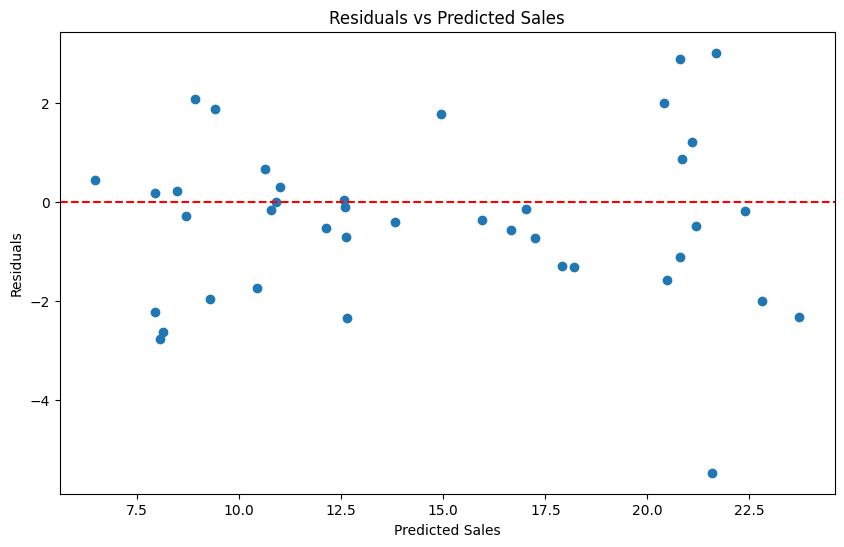


Polynomial Regression Model Mean Squared Error: 1.44254263690159
Polynomial Regression Model R^2 Score: 0.9533174341074723

Random Forest Regressor Mean Squared Error: 1.4374328500000009
Random Forest Regressor R^2 Score: 0.9534827934927883


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('/content/sample_data/advertising.csv')

print("First few rows of the dataset:")
print(data.head())

print("\nMissing values in each column:")
print(data.isnull().sum())

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nLinear Regression Model Mean Squared Error: {mse}")
print(f"Linear Regression Model R^2 Score: {r2}")

coefficients = model.coef_
features = X.columns

print("\nFeature Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f'Feature: {feature}, Coefficient: {coef}')

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nPolynomial Regression Model Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression Model R^2 Score: {r2_poly}")


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R^2 Score: {r2_rf}")
